# Aula 02 - Análise exploratória de dados
## Geração de gráficos utilizando matplotlib e plotly
### Abrindo base de dados

In [1]:
import pandas as pd
dados = pd.read_pickle('dados_aula.pkl')
dados

,codigo_pedido,colaborador,tipo,data_abertura,data_fechamento,data_inclusao_item,quantidade,preco_unitario,preco_total,preco_custo,nome_produto,categoria,numero_mesa,forma_pagamento,valor_final,status_pedido
0,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:33:58.189,1,13.0,13.0,5.0,OPA BIER PILSEN,BEBIDAS,63.0,Cartão de Crédito,109.0,Finalizado/Pago
1,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:34:11.771,1,75.0,75.0,35.0,CAMARÃO,COZINHA,63.0,Cartão de Crédito,109.0,Finalizado/Pago
2,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:34:58.645,1,9.0,9.0,4.0,STELLA ARTOIS,BEBIDAS,63.0,Cartão de Crédito,109.0,Finalizado/Pago
3,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:40:11.898,1,9.0,9.0,4.0,STELLA ARTOIS,BEBIDAS,63.0,Cartão de Crédito,109.0,Finalizado/Pago
4,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 19:17:45.334,1,3.0,3.0,2.0,TRIDENT,BALCÃO,63.0,Cartão de Crédito,109.0,Finalizado/Pago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31777,19502,Chefia,Mesa/Comanda,2022-12-08 19:57:54.125,2022-12-08 20:32:14.834,2022-12-08 20:31:55.323,1,12.0,12.0,6.0,HEINEKEN LONG,BEBIDAS,1.0,Dinheiro,54.0,Finalizado/Pago
31778,19502,Chefia,Mesa/Comanda,2022-12-08 19:57:54.125,2022-12-08 20:32:14.834,2022-12-08 20:31:55.869,1,12.0,12.0,6.0,HEINEKEN LONG,BEBIDAS,1.0,Dinheiro,54.0,Finalizado/Pago
31779,19503,Chefia,Balcao,2022-12-08 20:04:09.371,2022-12-08 20:07:10.789,2022-12-08 20:04:16.526,1,12.0,12.0,6.0,CORONA EXTRA LONG,BEBIDAS,NaN,Pagamento Instantâneo (PIX),12.0,Finalizado/Pago
31781,19505,Chefia,Balcao,2022-12-08 21:03:11.918,2022-12-08 21:04:02.578,2022-12-08 21:03:16.698,1,12.0,12.0,5.0,KEEP COOLER,BEBIDAS,NaN,Pagamento Instantâneo (PIX),25.0,Finalizado/Pago


### Análise univariada - analisar a distribuição de dados de uma váriável
<p>Exemplo: analisar a distribuição de valores de comanda ao longo do ano</p>
<p>Iniciamos agrupando por número de comanda agregando por meio de soma o valor total dos itens incluídos</p>

In [2]:
comandas = dados.groupby(by=['codigo_pedido']).agg(
    total_comanda = ('preco_total','sum')
).reset_index()
comandas

,codigo_pedido,total_comanda
0,9891,109.0
1,9892,50.0
2,9893,38.0
3,9894,32.0
4,9895,24.0
...,...,...
7218,19499,77.0
7219,19501,44.0
7220,19502,54.0
7221,19503,12.0


<p>Análise numérica</p>

In [3]:
comandas.total_comanda.describe()

count    7223.000000
mean       77.684156
std        92.838448
min         1.000000
25%        24.000000
50%        52.000000
75%        98.000000
max      1900.000000
Name: total_comanda, dtype: float64

<p>Histograma para análise de distribuição de frequência</p>

In [4]:
import matplotlib.pyplot as plt

(array([4.217e+03, 1.821e+03, 6.460e+02, 2.700e+02, 1.190e+02, 6.700e+01,
        2.400e+01, 1.200e+01, 1.400e+01, 7.000e+00, 5.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 6.4300e+01, 1.2760e+02, 1.9090e+02, 2.5420e+02,
        3.1750e+02, 3.8080e+02, 4.4410e+02, 5.0740e+02, 5.7070e+02,
        6.3400e+02, 6.9730e+02, 7.6060e+02, 8.2390e+02, 8.8720e+02,
        9.5050e+02, 1.0138e+03, 1.0771e+03, 1.1404e+03, 1.2037e+03,
        1.2670e+03, 1.3303e+03, 1.3936e+03, 1.4569e+03, 1.5202e+03,
        1.5835e+03, 1.6468e+03, 1.7101e+03, 1.7734e+03, 1.8367e+03,
        1.9000e+03]),
 <BarContainer object of 30 artists>)

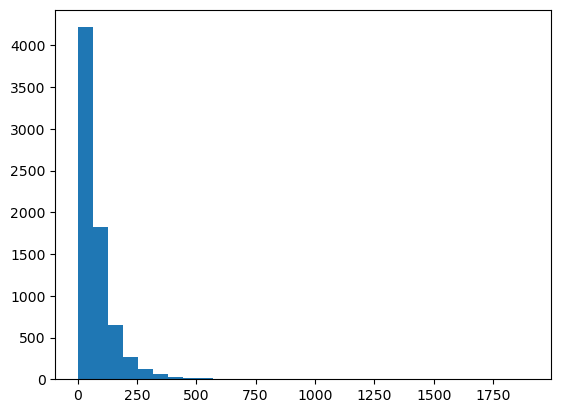

In [5]:
plt.hist(comandas.total_comanda,bins = 30)

<p>Box plot para identificação de outliers e averiguação de mínimos, máximos, quartis e mediana</p>

{'whiskers': [<matplotlib.lines.Line2D at 0x2b9bcf82ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9bbdd60a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b9bcf827f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9bbdd6640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9bbdd6910>],
 'means': []}

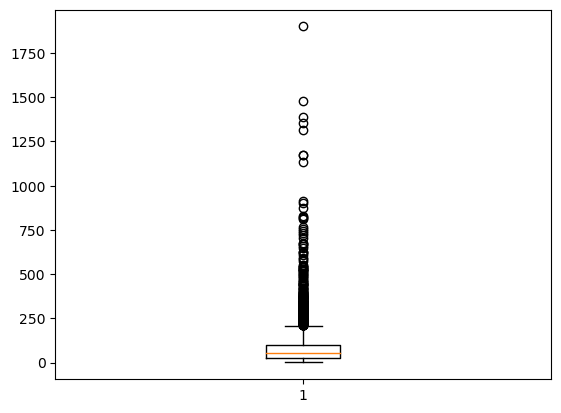

In [6]:
plt.boxplot(comandas.total_comanda)

<p>Exemplo: análise dos produtos com maiores vendas</p>
<p>Para isso, precisamos agrupar pelo nome de produto e agregar pela contagem de vezes que ele aparece no dataframe</p>

In [7]:
produtos = dados.groupby(by=['nome_produto']).agg(
    total_vendas = ('nome_produto','count')
).reset_index()
produtos

,nome_produto,total_vendas
0,ABSOLUT,30
1,AGUA,1210
2,AGUA DE COCO 1L,6
3,AGUA SEM GAS,402
4,AGUA TONICA ANTARTICA,37
...,...,...
201,WHITE HORSE,10
202,X,167
203,X-FRANGO,37
204,cover 5,144


<p>Ordenando dataframe</p>

In [8]:
produtos = produtos.sort_values(by = 'total_vendas',ascending=False)
produtos

,nome_produto,total_vendas
119,HEINEKEN LONG,2920
70,COVER 15,2023
41,BUDWEISER LONG,1904
74,Chopp San Diego,1891
71,COVER 20,1729
...,...,...
40,BUCHANANS 12 ANOS,1
37,BOOMBAY,1
20,BALLANTINES FINEST,1
21,BALLATINES,1


<p>Selecionando as 10 primeiras linhas</p>

In [9]:
produtos_top = produtos.head(10)
produtos_top

,nome_produto,total_vendas
119,HEINEKEN LONG,2920
70,COVER 15,2023
41,BUDWEISER LONG,1904
74,Chopp San Diego,1891
71,COVER 20,1729
175,SPATEN,1323
65,CORONA EXTRA LONG,1234
1,AGUA,1210
173,SOL LONG,1120
11,AMSTEL LATÃO,1003


<p>Gráfico de barras para análise univariada de variável categórica</p>

<BarContainer object of 10 artists>

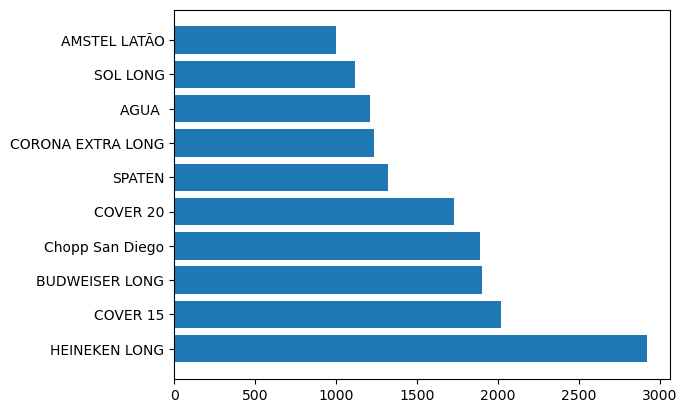

In [10]:
plt.barh(y = produtos_top.nome_produto,width = produtos_top.total_vendas)

<p>Estilizando o gráfico com informações</p>

Text(0.5, 1.0, 'Items mais vendidos')

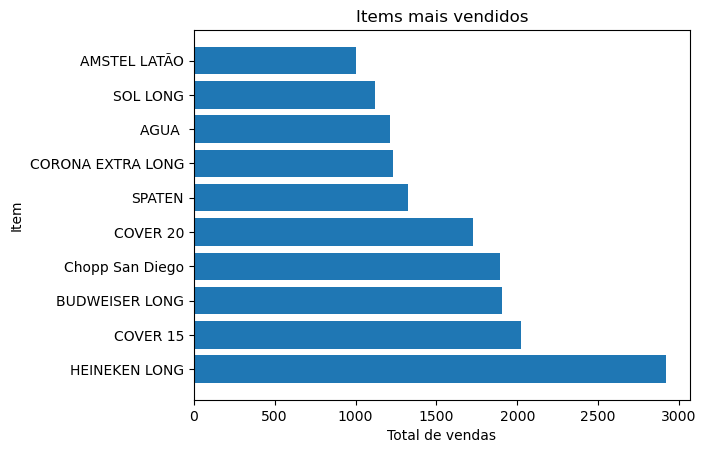

In [11]:
plt.barh(y = produtos_top.nome_produto,width = produtos_top.total_vendas)
plt.xlabel('Total de vendas')
plt.ylabel('Item')
plt.title('Items mais vendidos')

<p>Salvando imagem</p>

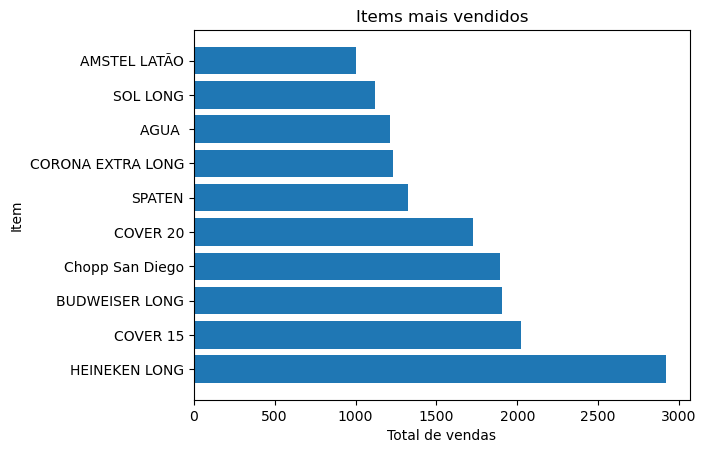

In [12]:
plt.barh(y = produtos_top.nome_produto,width = produtos_top.total_vendas)
plt.xlabel('Total de vendas')
plt.ylabel('Item')
plt.title('Items mais vendidos')
plt.savefig('produtos_mais_vendidos.jpg')

### Trabalhando com a biblioteca plotly

In [13]:
import plotly.graph_objects as go

In [14]:
fig = go.Figure()
imagem = go.Bar(
    x = produtos_top.total_vendas,
    y = produtos_top.nome_produto,
    orientation='h',
)
fig.add_trace(imagem)
fig.write_html('plot_produtos.html')

### Análise bivariada
<p>Temos interesse de saber como uma variável se comporta em relação à outra</p>
<p>Exemplo: ver como o custo dos produtos estão relacionados com seu preço unitário</p>
<p>Vamos agrupar por produto agregando o valor mínimo do custo e do preço unitário para nos basearmos</p>

In [15]:
custo_preco_produtos = dados.groupby(by='nome_produto').agg(
    custo = ('preco_custo','min'),
    preco = ('preco_unitario','min')
).reset_index()
custo_preco_produtos


,nome_produto,custo,preco
0,ABSOLUT,65.00,160.0
1,AGUA,0.90,3.0
2,AGUA DE COCO 1L,8.00,14.0
3,AGUA SEM GAS,0.85,3.0
4,AGUA TONICA ANTARTICA,2.50,6.0
...,...,...,...
201,WHITE HORSE,60.00,130.0
202,X,10.00,22.0
203,X-FRANGO,9.00,20.0
204,cover 5,0.00,5.0


<p>Análise entre duas variáveis numéricas contínuas: geralmente utiliza-se scatter plot</p>

Text(0, 0.5, 'Preço unitário (R$)')

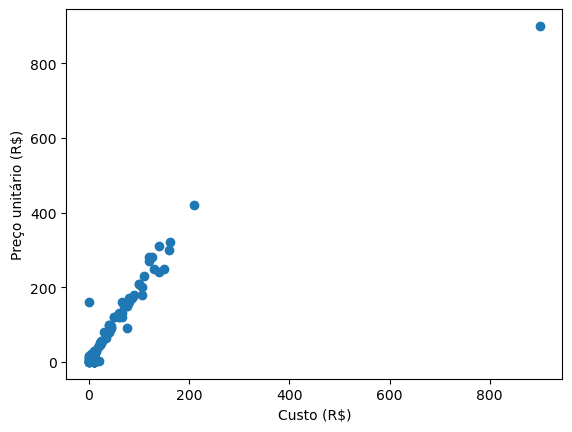

In [16]:
plt.scatter(
    x = custo_preco_produtos.custo,
    y = custo_preco_produtos.preco,
)
plt.xlabel('Custo (R$)')
plt.ylabel('Preço unitário (R$)')

<p>Exemplo: valor total vendido por mês</p>
<p>Para este exemplo, precisamos agrupar o dataframe pela data e agregar pela soma do valor total de produtos</p>

In [17]:
dados.head(5)

,codigo_pedido,colaborador,tipo,data_abertura,data_fechamento,data_inclusao_item,quantidade,preco_unitario,preco_total,preco_custo,nome_produto,categoria,numero_mesa,forma_pagamento,valor_final,status_pedido
0,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:33:58.189,1,13.0,13.0,5.0,OPA BIER PILSEN,BEBIDAS,63.0,Cartão de Crédito,109.0,Finalizado/Pago
1,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:34:11.771,1,75.0,75.0,35.0,CAMARÃO,COZINHA,63.0,Cartão de Crédito,109.0,Finalizado/Pago
2,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:34:58.645,1,9.0,9.0,4.0,STELLA ARTOIS,BEBIDAS,63.0,Cartão de Crédito,109.0,Finalizado/Pago
3,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 18:40:11.898,1,9.0,9.0,4.0,STELLA ARTOIS,BEBIDAS,63.0,Cartão de Crédito,109.0,Finalizado/Pago
4,9891,Chefia,Mesa/Comanda,2022-01-04 18:33:39.835,2022-01-04 19:18:02.362,2022-01-04 19:17:45.334,1,3.0,3.0,2.0,TRIDENT,BALCÃO,63.0,Cartão de Crédito,109.0,Finalizado/Pago


In [18]:
total_diario = dados.groupby(by=[pd.Grouper(
    key = 'data_inclusao_item',
    freq = 'M'
)]).agg(
    total_vendido = ('preco_total','sum')
).reset_index()

In [19]:
total_diario

,data_inclusao_item,total_vendido
0,2022-01-31,39246.18
1,2022-02-28,55327.51
2,2022-03-31,49993.14
3,2022-04-30,71116.05
4,2022-05-31,45168.62
5,2022-06-30,49753.31
6,2022-07-31,57630.36
7,2022-08-31,40950.64
8,2022-09-30,56388.26
9,2022-10-31,54640.32


<p>Plotando o gráfico e estilizando o gráfico</p>

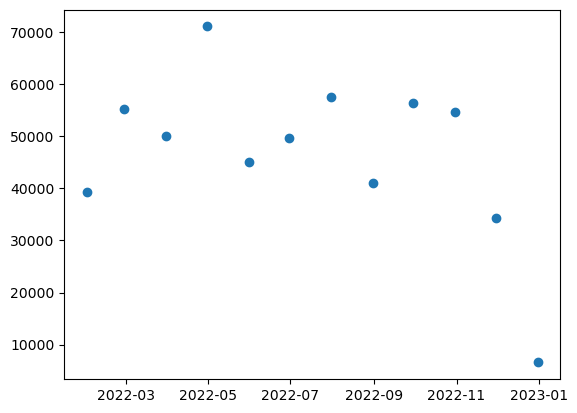

In [20]:
plt.scatter(
    x = total_diario.data_inclusao_item,
    y = total_diario.total_vendido,
    
)

<p>Com comandos básicos, a biblioteca matplotlib e também a plotly, entregam gráficos muito pobres em estilização e em formatação. É necessário evoluir no conhecimento da biblioteca para gerarmos gráficos mais avançados</p>

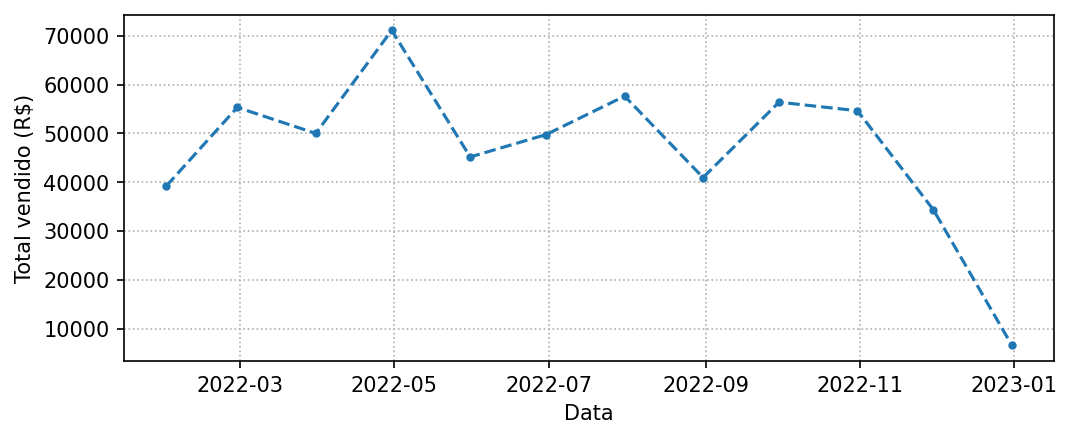

In [21]:
fig,ax = plt.subplots(1, figsize = (8,3), dpi = 150) #cria uma figura vazia
l1 = ax.plot( #plot faz um gráfico similar ao scatter, mas com linhas ligando os pontos
    total_diario.data_inclusao_item,
    total_diario.total_vendido,
    marker = '.', #utiliza um ponto menor como marcador, se não for definido, não haverá pontos
    linestyle = '--' #faz a linha ficar tracejada
)
ax.set_xlabel('Data')
ax.set_ylabel("Total vendido (R$)")
ax.grid(ls = ':') #coloca um grid no fundo do gráfico tipo pontilhado
fig.savefig('evolucao_mensal_total_vendido.jpg',bbox_inches = 'tight') # a opção bbox_inches = 'tight' garante que toda a imagem seja salva


### Análise multivariada
<p>Na análise multivariada, normalmente utilizamos outras opções visuais para incluir mais informações em um mesmo gráfico, sejam categorias, dados numéricos, etc.</p>
<p>Exemplo: fazer uma análise cruzando total vendido, forma de pagamento e categoria de produto vendido.</p>
<p>Regras de negócio pré-definidas a serem aplicadas:</p>
<p>1. Qualquer pagamento que tenha sido dividido entre mais de um formato, será considerado como 'Mais de um formato'.</p>
<p>2. Vendas no balcão não devem ser consideradas uma vez que pagamentos por couverts ou entrada não tem custo associado</p>

In [22]:
dados2 = dados.copy()
dados2.forma_pagamento.value_counts()

forma_pagamento
Cartão de Débito                                                                            12689
Dinheiro                                                                                     6746
Cartão de Crédito                                                                            6123
Pagamento Instantâneo (PIX)                                                                  1858
Cartão de Débito, Dinheiro                                                                   1394
Cartão de Crédito, Cartão de Débito                                                           945
Cartão de Crédito, Dinheiro                                                                   411
Cartão de Crédito, Cartão de Débito, Dinheiro                                                 375
Cartão de Débito, Pagamento Instantâneo (PIX)                                                 217
Cheque                                                                                        130
Cart

In [23]:
#transformando dados
import numpy as np
lista_metodos_unicos = ['Cartão de Débito','Dinheiro','Cartão de Crédito','Pagamento Instantâneo (PIX)','Cheque']
dados2['forma_pagamento'] = np.where(dados2['forma_pagamento'].isin(lista_metodos_unicos),dados2['forma_pagamento'],'Mais de um método')
dados2.forma_pagamento.value_counts()

forma_pagamento
Cartão de Débito               12689
Dinheiro                        6746
Cartão de Crédito               6123
Mais de um método               4011
Pagamento Instantâneo (PIX)     1858
Cheque                           130
Name: count, dtype: int64

In [24]:
dados2 = dados2[dados2['categoria']!='BALCÃO']

In [25]:
dados2.sample(5)

,codigo_pedido,colaborador,tipo,data_abertura,data_fechamento,data_inclusao_item,quantidade,preco_unitario,preco_total,preco_custo,nome_produto,categoria,numero_mesa,forma_pagamento,valor_final,status_pedido
30311,19080,Chefia,Mesa/Comanda,2022-11-17 22:38:26.408,2022-11-18 00:57:04.773,2022-11-18 00:13:02.199,1,10.0,10.0,5.0,SPATEN,BEBIDAS,136.0,Cartão de Débito,75.0,Finalizado/Pago
15838,14721,Chefia,Mesa/Comanda,2022-06-10 21:29:52.878,2022-06-10 23:54:36.323,2022-06-10 22:10:26.063,1,22.0,22.0,10.0,CAIPIRA DE VINHO,CAIPIRA,15.0,Cartão de Débito,79.0,Finalizado/Pago
13126,13791,Chefia,Mesa/Comanda,2022-05-07 23:48:17.469,2022-05-08 01:31:57.295,2022-05-08 00:58:44.497,1,6.0,6.0,2.5,SCHWEPPES CITRUS,BEBIDAS,36.0,Mais de um método,257.0,Finalizado/Pago
24665,17292,Chefia,Mesa/Comanda,2022-09-16 23:03:24.557,2022-09-17 03:06:49.432,2022-09-16 23:05:21.653,1,10.0,10.0,4.0,BUDWEISER LONG,BEBIDAS,118.0,Cartão de Débito,81.0,Finalizado/Pago
5614,11598,Ana,Mesa/Comanda,2022-02-26 22:32:28.802,2022-02-27 00:25:41.943,2022-02-26 22:45:04.426,1,12.0,12.0,7.0,RED BULL 250 ml,BEBIDAS,7.0,Cartão de Débito,118.0,Finalizado/Pago


In [26]:
#calculando o custo total de cada item:
dados2['custo_total'] = dados2['preco_custo']*dados2['quantidade']

In [27]:
#agrupamento multicategoria agregando pela soma o preco_total e o custo_total
analise01 = dados2.groupby(by=['forma_pagamento','categoria']).agg(
    total_vendido = ('preco_total','sum'),
    total_custo = ('custo_total','sum')
)
analise01

total_vendido total_custo
forma_pagamento             categoria                           
Cartão de Crédito           BEBIDAS         73148.00    33340.71
                            CAIPIRA          9073.50      4560.0
                            COZINHA         12178.00      4837.5
                            DRINKS           1345.00       571.0
Cartão de Débito            BEBIDAS        144075.00    66909.31
                            CAIPIRA         17680.00      8880.0
                            COZINHA         20687.00      8084.5
                            DRINKS           2166.00       908.0
Cheque                      BEBIDAS          2476.00     1128.85
                            CAIPIRA           132.00        60.0
                            COZINHA           118.00        32.5
                            DRINKS             25.00        11.0
Dinheiro                    BEBIDAS         70196.00    32204.27
                            CAIPIRA          8720.33      4250.0
                            COZINHA          8262.00      3220.0
                            DRINKS           1667.00       706.0
Mais de um método           BEBIDAS         63752.00     27612.7
                            CAIPIRA          6104.45      3160.0
                            COZINHA         11990.00      4852.5
                            DRINKS           1101.00       483.0
Pagamento Instantâneo (PIX) BEBIDAS         21855.00      9840.0
                            CAIPIRA          1904.09       940.0
                            COZINHA          2372.00       887.0
                            DRINKS            536.00       226.0

In [28]:
#calculando o lucro para cada multicategoria
analise01['lucro'] = (analise01['total_vendido'] - analise01['total_custo'])/analise01['total_custo']*100
analise01 = analise01.reset_index()
analise01

,forma_pagamento,categoria,total_vendido,total_custo,lucro
0,Cartão de Crédito,BEBIDAS,73148.00,33340.71,119.395448
1,Cartão de Crédito,CAIPIRA,9073.50,4560.0,98.980263
2,Cartão de Crédito,COZINHA,12178.00,4837.5,151.741602
3,Cartão de Crédito,DRINKS,1345.00,571.0,135.551664
4,Cartão de Débito,BEBIDAS,144075.00,66909.31,115.328779
5,Cartão de Débito,CAIPIRA,17680.00,8880.0,99.099099
6,Cartão de Débito,COZINHA,20687.00,8084.5,155.884718
7,Cartão de Débito,DRINKS,2166.00,908.0,138.546256
8,Cheque,BEBIDAS,2476.00,1128.85,119.338265
9,Cheque,CAIPIRA,132.00,60.0,120.0


<p>Preparando o gráfico de barras multicategoria</p>

In [29]:
import plotly.express as px
grafico = px.histogram(
    analise01,
    x = 'forma_pagamento',
    y = 'lucro',
    color = 'categoria',
    barmode='group'
)
grafico.write_html('analise_multivariada_01.html')